# Lecture 11 Model Fitting


One of the most common analysis techniques (methodologies) in scientific computing is fitting data. 

Fitting provides insight into the physics of data and is used to compare data to models and extract additional information from data such as rates of change (slopes).

Numerical Recipes devotes a number of sections and chapters to this.

Today we will look at:
* Least squares fitting
    * scipy linear regression
    * scipy curve_fit

However many other algorithms and python software packages exist for curve fitting: 
* numpy.polyfit, simple polynomial fitting
* astropy.modeling, 1 and 2 dimensional fitting
* lmfit, the Levenberg-Marquardt fitting algorithm


In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

## Fitting a straight line

One of the most *used* fitting routines is fitting a straight line. 

In [2]:
# lets create a simple data set
#  x and y(x)+noise
#  and fit a line

np.random.seed(123)
x = np.linspace(0.0,10.0,10)
y = 2.0 + 3.0 * x + np.random.normal(2.0,2.0,len(x))


Linear Fit
Slope:  3.00 
Intercept:  3.47 
Correlation Coeffecient:  0.97 
P Value: 4.3e-06 
Standard Error:  0.27 


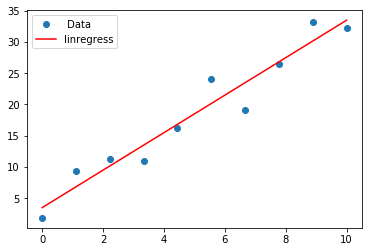

In [3]:
# import stats from scipy
from scipy import stats

# calculate the 
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print("Linear Fit")
print("Slope: {:5.2f} ".format(slope))
print("Intercept: {:5.2f} ".format(intercept))
print("Correlation Coeffecient: {:5.2f} ".format(r_value))
print("P Value: {:5.2g} ".format(p_value))
print("Standard Error: {:5.2f} ".format(std_err))

# plot the data and fit
plt.plot(x, y, 'o', label=' Data')
plt.plot(x, intercept + slope*x, 'r', label='linregress')
plt.legend()
plt.show()

## SciPy curve_fit

**curve_fit** is a powerful routine in **scipi.optomize** which allows fitting of generic functions.  


Linear Fit curve_fit
Coeff 1:  3.47 +/-  1.62
Coeff 2:  3.00 +/-  0.27


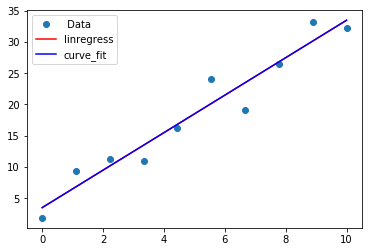

In [4]:
from scipy.optimize import curve_fit

# define the function that we want 
#  to fit to
def line(x, A, B): 
    return A + B*x

# call curve fit, returns the coeffecients from line
#  and the estimated covariance of the coeffecients
coef,cm = curve_fit(line, x, y)
# calculate 1 sigma errors on the 
#  fits, sqrt of the diagnols of the 
#  covairance
coeff_error = np.sqrt(np.diag(cm))
print("Linear Fit curve_fit")
print("Coeff 1: {0:5.2f} +/- {1:5.2f}".format(coef[0],coeff_error[0]))
print("Coeff 2: {0:5.2f} +/- {1:5.2f}".format(coef[1],coeff_error[1]))


# plot the data and fit
plt.plot(x, y, 'o', label=' Data')
plt.plot(x, intercept + slope*x, 'r', label='linregress')
plt.plot(x, intercept + slope*x, 'b', label='curve_fit')
plt.legend()
plt.show()

## More Complex Curves

Linear fits a simple and often a _go to_ for the first step to fittting; however, they can be *abused* as data is typically more complex then a simple line, e.g.:
- Exponentials
- Gaussians
- Trigonometic functions
- Elipses and circles

Lets look at a more complicated example; a time series of Gaussian signal with added noise.

In [5]:
# return a gaussian
def gauss(x, amplitude=1, mu=0, sig=1):
    return amplitude * np.exp(-np.power(x - mu, 2.) / (2 * np.power(sig, 2.)))

In [6]:
# time axis
n_points = 64

time_axis = np.linspace(0,16,n_points,endpoint=False)
fine_time_axis = np.linspace(time_axis[0], time_axis[-1], 10 * n_points, endpoint=False) # used to plot fit

In [7]:
# gaussian signal
amplitude = 120
mean = 6.5
width = 0.7

source = -1 * gauss(time_axis, amplitude, mean, width)

In [8]:
# add noise
noise_width = 10
noise = np.random.normal(0, noise_width, len(time_axis))
# add a pedestal
pedestal = -50

In [9]:
# construct the full signal
contaminated_pulse = source + noise + pedestal
# and define errors
errors = np.ones(len(contaminated_pulse)) * 10

# ensure that signal remains negative
for i in contaminated_pulse:
    if i > 0:
        i = -1 #setting to -1 and not to zero so as to not break some math later.
#this line basically just checks that all of our data points are negative 
#it's basically saying "our electronics can only measure signals in one direction"

Text(0,0.5,u'v (mV)')

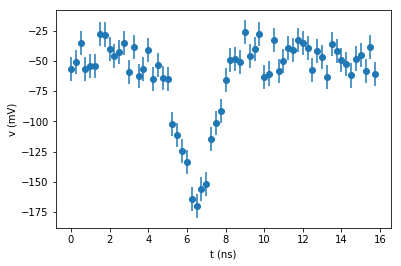

In [10]:
# plot the signal
plt.errorbar(time_axis, contaminated_pulse, errors,fmt='o')
plt.xlabel("t (ns)")
plt.ylabel("v (mV)")

SciPy *curve_fit* fits an arbitrary function ```f``` to a set of data assuming that ```ydata = f(xdata,*params)```  where _ydata_ and _xdata_ are the observed quantites and _*params*_ are the fit parameters.

SciPy *curve_fit* also requires an initial guess for the fit parameters (if none are given they are assumed to be 1). The choice of the initial fitting parameters can be very important. If the initall guesses are poor the fit may not converge to a single solution.

# FINISH THIS
## what are args and kwargs



In [11]:
#Passing arguments this way allows you to pass an arbitrarily large number of arguments to a function. 
#for example: 

def foo(x, *args):
    print("args:")
    for arg in args:
        print(arg)
        
def foo2(x, **kwargs):
    print("kwargs:")
    for key in kwargs.keys():
        print("{0:s}: {1}".format(key, kwargs[key]))
    
    
def foo3(x, *args, **kwargs):
    print("args:")
    for arg in args:
        print(arg)
    print("-----")    
    print("kwargs:")
    for key in kwargs.keys():
        print("{0:s}: {1}".format(key, kwargs[key]))
        

foo(time_axis, 10, 19, "stealth")       
print()
foo2(time_axis, a=10, b=12, name="stealth_bird")
print()
foo3(time_axis, 10, 19, "jupiter", r="one_string", g='a', something_else="some other string", input_list=[12,13,190])

args:
10
19
stealth
()
kwargs:
a: 10
b: 12
name: stealth_bird
()
args:
10
19
jupiter
-----
kwargs:
something_else: some other string
r: one_string
input_list: [12, 13, 190]
g: a


In [12]:
# redifine gauss using *args
def gauss(x, *args):

    A, mu, sigma = args
    return A*np.exp(-(x-mu)**2/(2.*sigma**2)) 

In [13]:
# fit the data to the gauss function

param_names = ["norm", "mean", "width"]
p0 = [contaminated_pulse.max(), 5., -1]

# fit
coeff, cm = curve_fit(gauss, time_axis, contaminated_pulse, p0=p0, sigma=errors)
# errors in fit coefficients
coeff_error = np.sqrt(np.diag(cm))

# use the fit coefficeints to calculate the fit
#  use the fine_time_axis to create a smooth fit
flux_fit = gauss(fine_time_axis, *coeff)



norm    : -86.92 +-   6.62
mean    :   6.82 +-   0.48
width   :  -5.08 +-   0.59


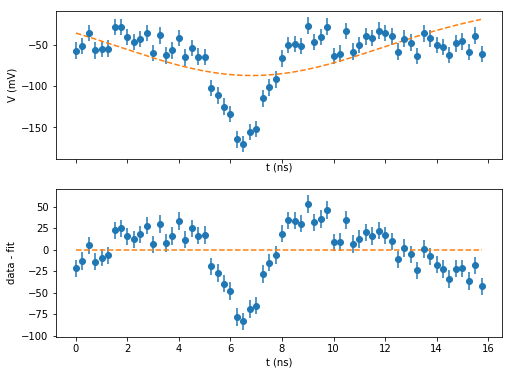

Text(0.5,0,u'data-fit')

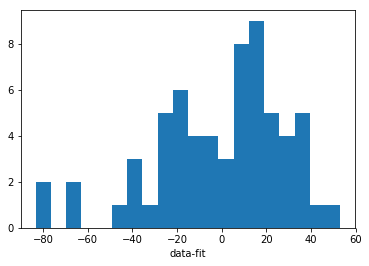

In [14]:
# print and plot the fit coeffecients and residuals
for name, param,error in zip(param_names, coeff, coeff_error):
    print("{0:8s}: {1:6.2f} +- {2:6.2f}".format(name, param, error))
    
fig,axes = plt.subplots(2,1, sharex=True, figsize=[8,6])
axes[0].errorbar(time_axis, contaminated_pulse, errors, fmt='o')
axes[0].plot(fine_time_axis, flux_fit,"--")

residuals = contaminated_pulse - gauss(time_axis, *coeff)
axes[1].errorbar(time_axis, residuals, errors, fmt='o')
axes[1].plot(time_axis, np.zeros(len(time_axis)), '--')

for a in axes:
    a.set_xlabel("t (ns)")
axes[0].set_ylabel("V (mV)")
axes[1].set_ylabel("data - fit")
plt.show()

# plot a histogram of the residuals
plt.hist(residuals, bins=20)
plt.xlabel("data-fit")   

By _eye_ it looks like our fit did a poor job. The residuals are quite structured when they should be distributed as a guassian. 

One method of testing and qauntifying how good a fit is is the $\chi^2$ test. It is a measure of the distance the data points are away from the fit. The simplest version (one without error bars) can be calculated as follows:

$$ \chi^2 = \sum_{i} \frac{(y_i - f(x_i))^2}{\sigma_i^2}$$

where $f(x)$ is your model (i.e. the function you are fitting), $x_i$ is the independent variable and $y_i$ and $\sigma_i$ are are your measurements and their uncertainties.

Generally, the number we want to quote is the _chi-square per degrees of freedom_ ( $\chi^2 / NDF$ ), which takes into consideration the number of data points going into a fit. If you have more data points than you do paremeters in your model, in general you will produce a better fit. The number of degrees of freedom is calculated as

$$ NDF = k - n_{p} $$

where $n_{p}$ is the number of parameters in your fit and $k$ is the number of data points or measurements. So, if we were fitting a straight line (2 parameters, slope and intercept) to a set of 10 measurements, we would have 8 degrees of freedom.

In [15]:
# function for chi square
def calc_chisquare(meas, sigma, fit):
    
    diff = pow(meas-fit, 2.)
    test_statistic = (diff / pow(sigma,2.)).sum()
    
    return test_statistic

# calculate the chi sqaure and chi square/NDF
TS = calc_chisquare(contaminated_pulse, errors, gauss(time_axis, *coeff))
NDF = len(contaminated_pulse) - len(coeff)
print("chisquare/NDF = {0:.2f} / {1:d}  = {2:.2f}".format(TS, NDF, TS / float(NDF)))

chisquare/NDF = 561.36 / 61  = 9.20


This isn't a great $\chi^2$. Generally we expect a good fit to have a $\chi^2 / NDF$ of about 1 -- this means that all data points lie within ~1 error bar of the fit vale.

If a $\chi^2/NDF$ value is too small, it usually means that our errorbars are too large; conversely if the errorbars are too small we can end up with a huge chisquare, so this must all be taken with a bit of a grain of salt.

---
** Why was our initial fit so poor? Can we do better? **

---

Yes. 

We are fitting a simple Gaussian, which doesn't account for the offset from zero away from the pulse -- this is because we have a **pedestal**, which can be thought of as what is seen by an instrument or electronics even when there is no signal. 

One way to handle this is to subtract off the pedestal, but how do we compute it? 

If we make some assumptions (e.g. our signal arrives somewhere around the middle of our data) then we can calculate the pedestal from the first few measurements and subtract it from all of the data. This is similar to how we defined the _noise_ signal in the previous lecture and should help the fit significantly. 

In [16]:
# define the pedastal whe t is less then 4 ns
slice_condition = time_axis <= 4


[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False]
Pedestal Time
[ 0.    0.25  0.5   0.75  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75
  3.    3.25  3.5   3.75  4.  ]
Pedestal Data
[-56.78886152 -50.94708969 -35.08610374 -56.38901997 -54.4398196
 -54.34351276 -27.94069917 -28.13213912 -39.95946115 -46.1381372
 -42.62632398 -35.09275007 -59.35878588 -38.24421179 -62.55113099
 -56.43094705 -41.13286157]


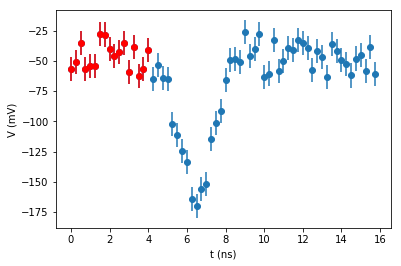

In [17]:
## What's going on here? 

# We are selecting a view of time_axis where time_axis is <= 4;
# This turns returns a truth table that we can use to slice out relevant data from our signal:
print(slice_condition)


pedestal_area = time_axis[slice_condition]
pedestal_values = contaminated_pulse[slice_condition]
print("Pedestal Time")
print(pedestal_area)
print("Pedestal Data")
print(pedestal_values)


plt.errorbar(time_axis, contaminated_pulse, errors, fmt='o')
plt.errorbar(time_axis[slice_condition], contaminated_pulse[slice_condition], errors[slice_condition], fmt='o', color = 'r')

plt.xlabel("t (ns)")
plt.ylabel("V (mV)")
plt.show()

Pedestal: -46.21


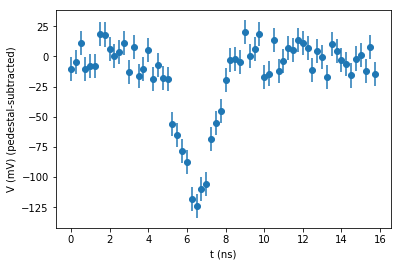

In [18]:
#Now we can manually compute the mean pedestal, subtract it off of our data, and plot it:
pedestal = pedestal_values.mean()
print("Pedestal: {0:.2f}".format(pedestal))
ped_subtracted_pulse = contaminated_pulse - pedestal

plt.errorbar(time_axis, ped_subtracted_pulse, errors, fmt="o")
plt.xlabel("t (ns)")
plt.ylabel("V (mV) (pedestal-subtracted)")
plt.show()

norm    : -118.14 +-   5.14
mean    :   6.46 +-   0.04
width   :  -0.85 +-   0.04


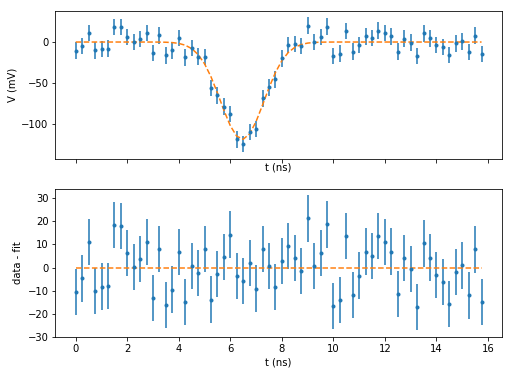

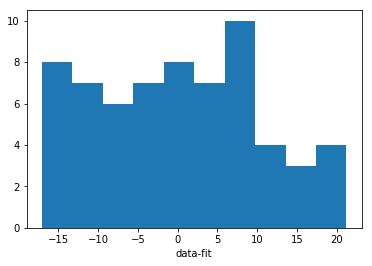

In [19]:
# define parameters and inital guesses
param_names = ["norm", "mean", "width"]
p0 = [contaminated_pulse.max(), 5., -1]

# fit the data and calculate errors
coeff, cm = curve_fit(gauss, time_axis, ped_subtracted_pulse, p0=p0, sigma=errors)
coeff_error = np.sqrt(np.diag(cm))
# calculate the fitted data
flux_fit = gauss(time_axis, *coeff)

# print the fit parameters
for name, param,error in zip(param_names, coeff, coeff_error):
    print("{0:8s}: {1:6.2f} +- {2:6.2f}".format(name, param, error))

# plot the data, fit and residuals
fig,axes = plt.subplots(2,1, sharex=True, figsize=[8,6])
axes[0].errorbar(time_axis, ped_subtracted_pulse, errors, fmt='.')
axes[0].plot(time_axis, flux_fit,"--")

residuals = ped_subtracted_pulse - flux_fit
axes[1].errorbar(time_axis, residuals, errors, fmt='.')
axes[1].plot(time_axis, np.zeros(len(time_axis)), '--')

for a in axes:
    a.set_xlabel("t (ns)")
axes[0].set_ylabel("V (mV)")
axes[1].set_ylabel("data - fit")

plt.show()
plt.hist(residuals, bins=10)
plt.xlabel("data-fit")
plt.show()


In [20]:
# calculate the new chi squared and chi squared/NDF
TS = calc_chisquare(ped_subtracted_pulse, errors, gauss(time_axis, *coeff))
NDF = len(ped_subtracted_pulse) - len(coeff)
print("chisquare/NDF = {0:.2f} / {1:d}  = {2:.2f}".format(TS, NDF, TS / float(NDF)))

chisquare/NDF = 64.47 / 61  = 1.06


** Excellent! ** We have a good fit now. 

There doesn't appear to be any structure in the residuals but random noise centered at zero. We could even fit that distribution and determine how well it is fitted by a Gaussian, which would give us a measure of how random our noise is (e.g. the noise could be **correlated** noise, which is very difficult to handle in experiments). 

---

** What else could we have done to improve the fit? Is there an alternative method to the above? **

---

We could include the pedestal in the model of the signal.

In [21]:
# gaussian plus a pedestal
#  requires function gauss 

def gauss_with_pedestal(x, *p):
    '''
    This is a Gaussian fit with a pedestal. 
    '''
    return gauss(x, *p[0:3]) + p[3]

norm    : -118.10 +-   5.30
mean    :   6.46 +-   0.04
width   :   0.84 +-   0.05
pedestal: -46.27 +-   1.53


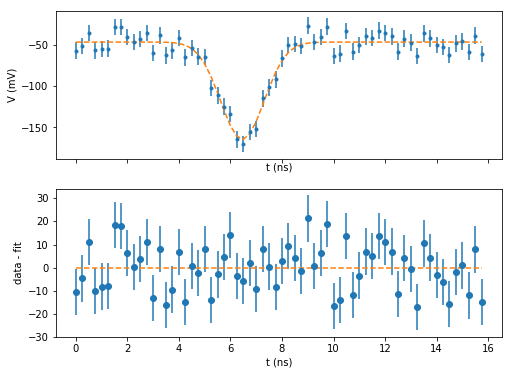

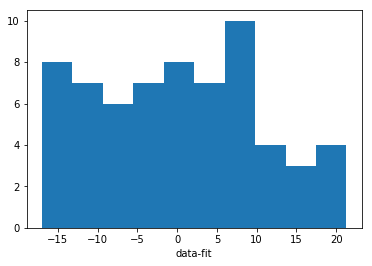

In [22]:
# define parameters and inital guess
param_names = ["norm", "mean", "width", "pedestal"]
p0 = [contaminated_pulse.min(), 6., 1., -10]

# calculte coeffecients and errors
coeff, cm = curve_fit(gauss_with_pedestal, time_axis, contaminated_pulse, p0=p0, sigma=errors)
coeff_error = np.sqrt(np.diag(cm))

# calculate fit
flux_fit = gauss_with_pedestal(time_axis, *coeff)

# print coeffecients
for name, param,error in zip(param_names, coeff, coeff_error):
    print("{0:8s}: {1:6.2f} +- {2:6.2f}".format(name, param, error))


# plot data, fit, and residuals    
fig,axes = plt.subplots(2,1, sharex=True, figsize=[8,6])
axes[0].errorbar(time_axis, contaminated_pulse, errors, fmt='.')
axes[0].plot(time_axis, flux_fit,"--")

residuals = contaminated_pulse - flux_fit
axes[1].errorbar(time_axis, residuals, errors, fmt='o')
axes[1].plot(time_axis, np.zeros(len(time_axis)), '--')

for a in axes:
    a.set_xlabel("t (ns)")
axes[0].set_ylabel("V (mV)")
axes[1].set_ylabel("data - fit")

plt.show()
plt.hist(residuals, bins=10)
plt.xlabel("data-fit")
plt.show()

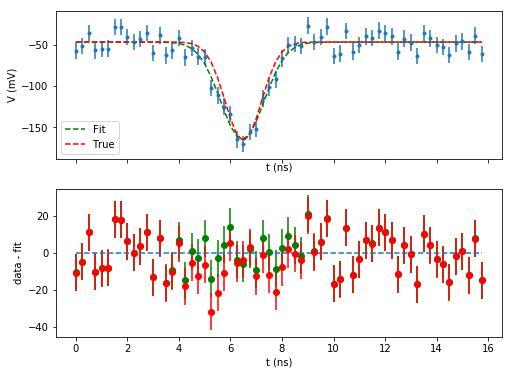

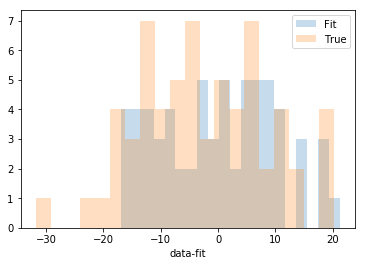

In [23]:
## We can plot this alongside the ACTUAL gaussian signal we generated and see how closely the fit 
## matches the real thing.

true_data = -gauss(time_axis, amplitude, mean, width) + pedestal

# plot data, fit, and true signal
fig,axes = plt.subplots(2,1, sharex=True, figsize=[8,6])
axes[0].errorbar(time_axis, contaminated_pulse, errors, fmt='.')
axes[0].plot(time_axis, flux_fit,"g--", label="Fit")
axes[0].plot(time_axis, true_data, 'r--', label="True")
axes[0].legend()

# plot residuals from the fit
residuals = contaminated_pulse - flux_fit
axes[1].errorbar(time_axis, residuals, errors, fmt='go')

# plot residuals from the true data, this is our noise array
residuals = contaminated_pulse - true_data
axes[1].errorbar(time_axis, residuals, errors, fmt='ro')
axes[1].plot(time_axis, np.zeros(len(time_axis)), '--')

for a in axes:
    a.set_xlabel("t (ns)")
axes[0].set_ylabel("V (mV)")
axes[1].set_ylabel("data - fit")

plt.show()

# histogram of the two residuals
plt.hist(contaminated_pulse - flux_fit, bins=20, label="Fit", alpha=0.25)
plt.hist(contaminated_pulse - true_data, bins=20, label="True", alpha=0.25)
plt.legend()
plt.xlabel("data-fit")
plt.show()